In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns

Make a function to generate a White Noise: parameters are the mean and the volatility

In [ ]:
def generate_data(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

* Draw A as a white Noise

* Draw B as a white Noise plus trend

* Plot them

<ipython-input-4-af265319e6c1>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index=range(T))
<ipython-input-4-af265319e6c1>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index=range(T))


Text(0.5, 1.0, 'Non-Stationary')

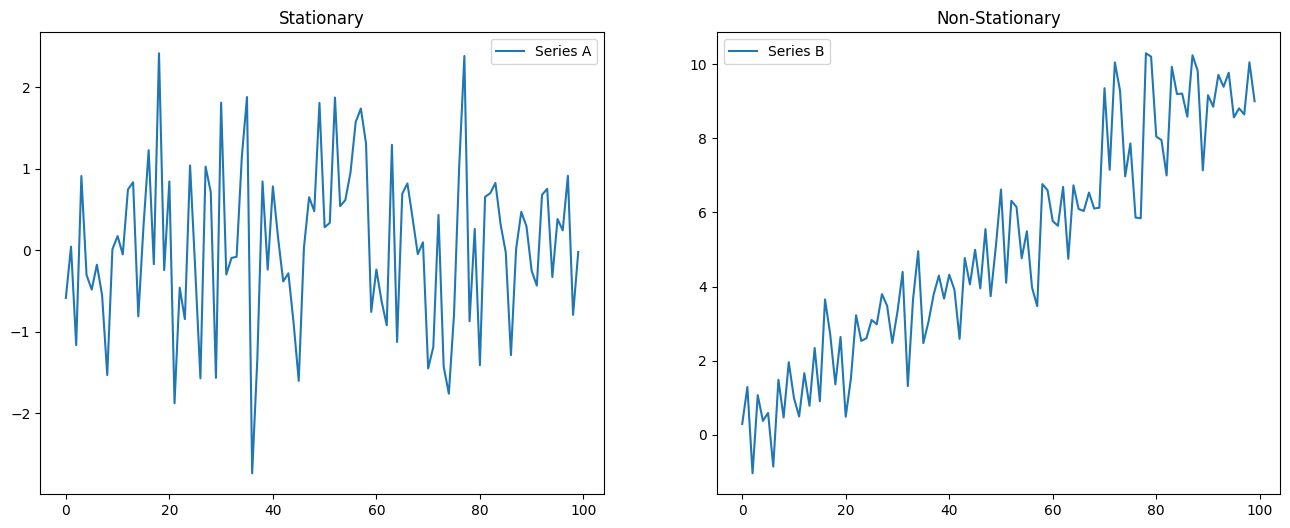

In [ ]:
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_data(params)

T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (t * 0.1, 1)
    B[t] = generate_data(params)

fig, (ax1, ax2) = plt.subplots(nrows =1, ncols =2, figsize=(16,6))

ax1.plot(A)
ax2.plot(B)
ax1.legend(['Series A'])
ax2.legend(['Series B'])
ax1.set_title('Stationary')
ax2.set_title('Non-Stationary')

* Plot 𝐵 and its mean to see if the mean have any information

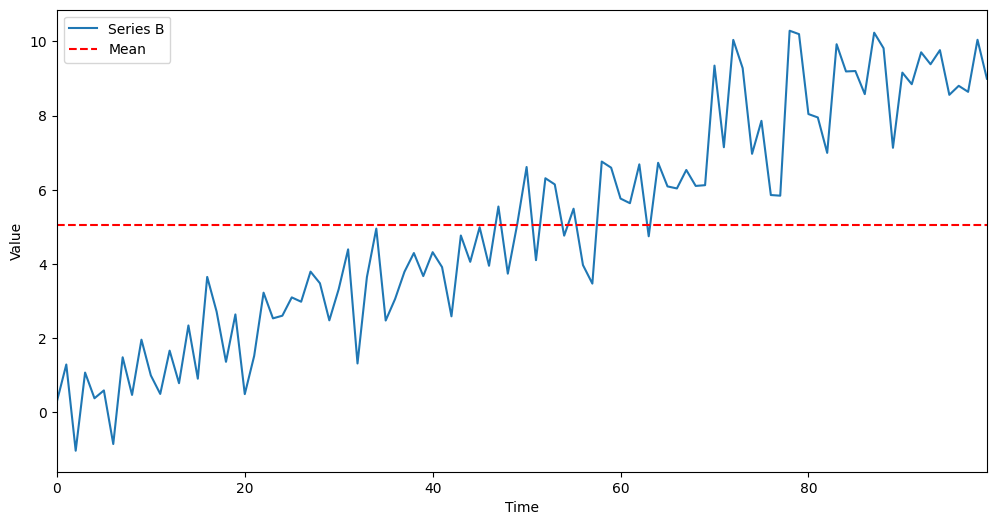

In [ ]:
mean = np.mean(B)

plt.figure(figsize=(12,6))
plt.plot(B)
plt.hlines(mean, 0, len(B), linestyles='dashed', colors = 'r')
plt.xlabel('Time')
plt.xlim([0, 99])
plt.ylabel('Value')
plt.legend(['Series B', 'Mean'])

The computed mean will show that the mean of all data points, but won't be useful for any forecasting of future state. It's meaningless when compared with any specific time, as it's a collection of different states at different times mashed together. This is just a simple and clear example of why non-stationarity can distort the analysis, much more subtle problems can arise in practice.

* Write a function to decide if a series is drawn from a stationary variable

* Use the ADF test

In [ ]:
def stationarity_test(X, cutoff=0.05):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')

* Test your function on A and B

In [ ]:
stationarity_test(A)
stationarity_test(B)

p-value = 3.7035133988885147e-16 The series A is likely stationary.
p-value = 0.7564666495494848 The series B is likely non-stationary.


* Test if B is stationary with trend (read the adfuller function defintion)

In [ ]:
print(adfuller(B,regression='ct'))
print('B is stationary with trend')

(-10.272863067945018, 6.192899568880127e-16, 0, 99, {'1%': -4.053254236405479, '5%': -3.455806184392646, '10%': -3.1535907061122397}, 264.11890237259576)
B is stationary with trend


* Draw X and Y cointegrated variables: draw the returns of the stocks and X and Y will be the total return

* Plot them

* If X and Y are the total return of stocks we can build a pair: Buy 1 euro of Y, sell 1 euro of X

* Draw the return of that porfolio and its mean

* What is your conclusion

* Check that X and Y are cointegrated using the coint function

In [ ]:
score, pvalue, _ = coint(X,Y)
print(pvalue)
print('pvalue is below 0.05 so X and Y are said to be cointegrated')

#Correlation

* Draw the return of 2 stocks with high correlation

* Print the total return of the stocks

* Draw the Spread of the two total returns

* Compute the correlation between the two stocks

* Are they cointegrated?

* Please explain why the two stocks are highly correlated but the spread exhibits huge divergence

#Real Market

* We are going to use Yahoo data

* Install yfinance module if you do not have it

In [ ]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
yf.pdr_override()

* Download Data from Yahoo for a few technology stocks

* Spend a bit of time to have a look at the DataFrame df

In [ ]:
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']


df = pdr.get_data_yahoo(tickers, start, end)['Adj Close']
df.tail()

[*********************100%%**********************]  11 of 11 completed


,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,ORCL,QCOM,SPY
Date,,,,,,,,,,,
2017-12-22,41.427498,175.000000,10.54,34.996426,17.779011,110.531761,24.360750,79.980293,43.101528,55.155365,242.913666
2017-12-26,40.376469,174.440002,10.46,35.163250,17.753920,110.770958,24.360750,79.877441,43.165237,54.788967,242.623062
2017-12-27,40.383587,175.360001,10.53,34.857410,17.787371,110.988373,24.377636,80.167366,43.119724,54.993462,242.741135
2017-12-28,40.497208,175.550003,10.55,35.144718,17.687019,111.647896,24.369194,80.176712,43.247147,54.857121,243.240555
2017-12-29,40.059277,175.240005,10.28,34.977905,17.569942,111.198540,24.056877,80.008369,43.028725,54.550377,242.323318


In [ ]:
returns = df.pct_change().iloc[1:]
total_return = returns.cumsum()


,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,ORCL,QCOM,SPY
Date,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,-0.015389,-0.015810,-0.021273,0.007990,-0.005500,-0.018491,-0.013396,-0.010954,-0.004633,-0.002260
2013-01-04,-0.027855,0.010066,0.040161,0.006292,0.000000,-0.006555,0.010411,-0.018715,0.008744,-0.014740,0.004392
2013-01-07,-0.005883,-0.004983,0.030888,0.013831,0.001982,-0.004381,-0.011285,-0.001870,-0.005201,0.008031,-0.002733
2013-01-08,0.002692,0.005272,0.000000,-0.015511,0.014502,-0.001398,-0.021340,-0.005245,0.000290,-0.001562,-0.002877
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.002521,-0.032140,-0.001322,0.000471,0.006601,0.006276,0.000117,0.001692,0.005281,-0.000262
2017-12-26,-0.025370,-0.003200,-0.007590,0.004767,-0.001411,0.002164,0.000000,-0.001286,0.001478,-0.006643,-0.001196
2017-12-27,0.000176,0.005274,0.006692,-0.008698,0.001884,0.001963,0.000693,0.003630,-0.001054,0.003732,0.000487


* Write a function to check all pairs of the stocks we have downloaded to see if they are cointegrated

* Output should print the (Stock_A, Stock_B) for all cointegrated pairs and return matrix with at cell Stock_A,Stock_B the p-value of the cointegration test of Stock_A vs Stock_B

In [ ]:
def find_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            pvalue = result[1]
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

* read the seaborn.heatmap documentation

* draw a heat map of the p_values of the cointegration test

[('AAPL', 'ORCL'), ('AAPL', 'SPY'), ('ADBE', 'EBAY'), ('ADBE', 'MSFT'), ('EBAY', 'MSFT'), ('HPQ', 'ORCL')]


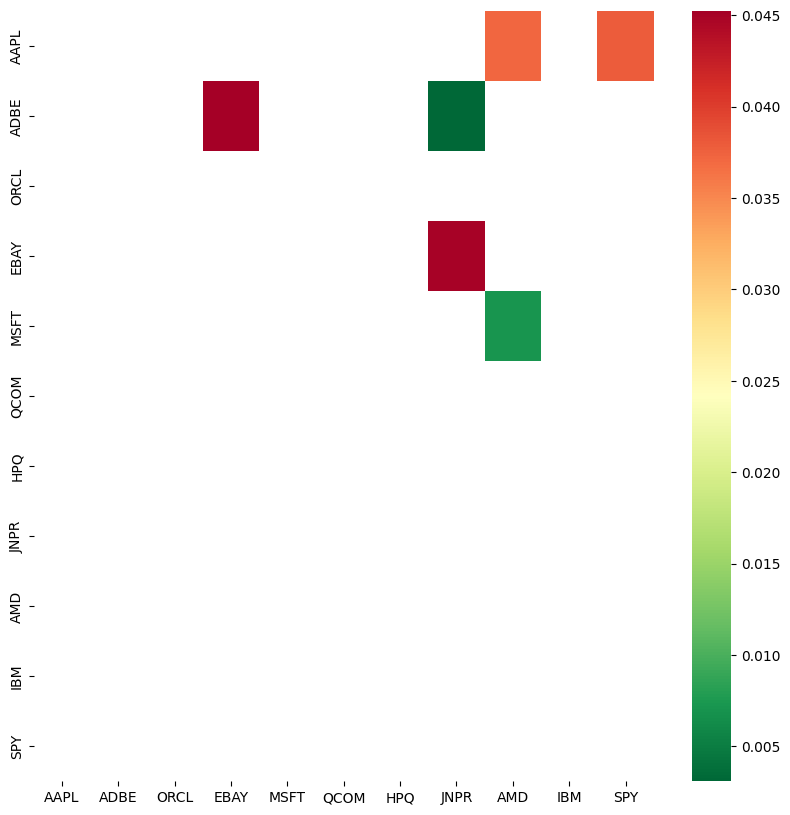

In [ ]:
pvalues, pairs = find_pairs(df)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r'
                , mask = (pvalues >= 0.05)
                )
print(pairs)

* We will study the pair ADBE vs MSFT

* What is the p_value for the cointegration test

In [ ]:
S1 = df['MSFT']
S2 = df['AMD']

score, pvalue, _ = coint(S1, S2)
pvalue


0.8659888641318927

* if $X$ and $Y$ are cointegrated:
$$\exists b \in \mathbb{R} \mbox{ s.t.  } X - b \times Y \mbox{ is stationary}$$

* find $b$ if $Y$ is the ADBE price and $X$ is the MSFT price

* Draw the spread $X - b \times Y $

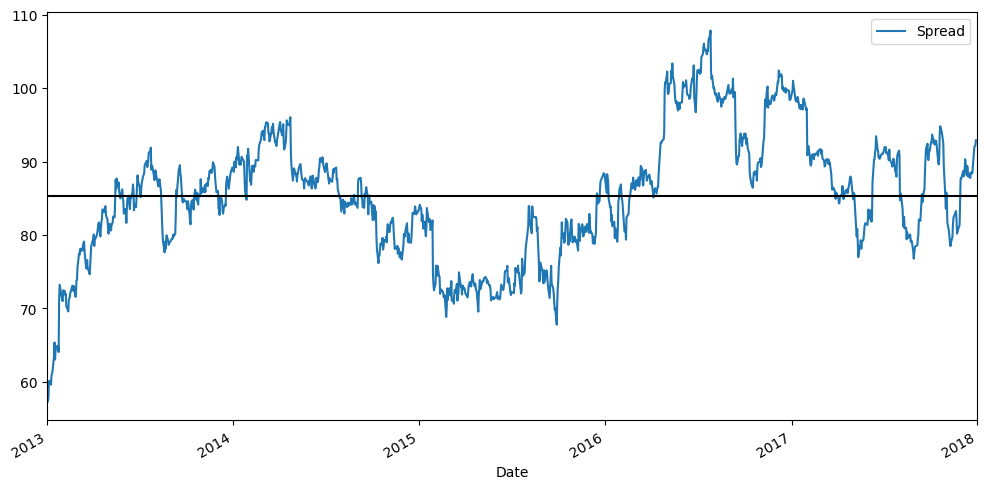

In [ ]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['AAPL']
b = results.params['AAPL']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread']);

* As the Spread is stationary we want to see when it is higher than 1 standard dev and below of 1 standard dev

* Draw the Spread plus one line at +1 std and -1 std

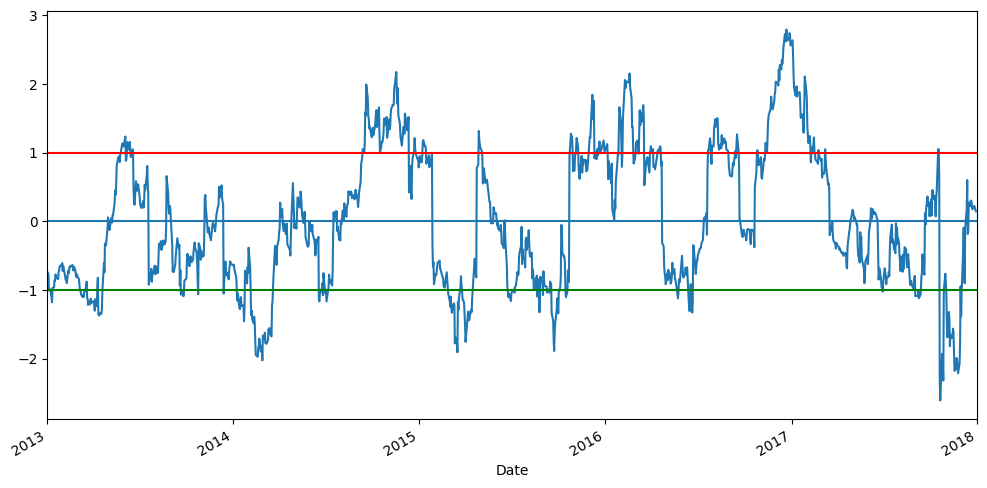

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(spread).plot(figsize=(12,6))
plt.axhline(zscore(spread).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.show()

* Define a strategy

* Compute the PnL

## Going Further
* Study the relation between Bitcoin and Etherum: BTC-USD and ETH-USD

* Study the Hurst Coefficient of the pairs of stocks